In [133]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 30)


In [134]:
# Load the AIT log data set v2

path_santos = "../AIT_LD-v2/santos"
df_raw = pd.read_csv(path_santos + "/gather/inet-firewall/logs/dnsmasq.log", header=None)
#df_auth.columns = ['date_time', 'log_provider', 'message']

# Display the first few rows of the data set
df_raw.head(2)

# Display the entries corresponding to attack (rows 144-151)
df_raw

,0
0,Jan 14 00:00:09 dnsmasq[14...
1,Jan 14 00:00:09 dnsmasq[14...
2,Jan 14 00:00:09 dnsmasq[14...
3,Jan 14 00:00:23 dnsmasq[14...
4,Jan 14 00:00:23 dnsmasq[14...
...,...
275662,Jan 17 23:44:37 dnsmasq[14...
275663,Jan 17 23:44:37 dnsmasq[14...
275664,Jan 17 23:44:37 dnsmasq[14...
275665,Jan 17 23:58:37 dnsmasq[14...


In [135]:
import json

# load labels from json line by line
true_labels = []

with open(path_santos + "/labels/inet-firewall/logs/dnsmasq.log") as file:
    for line in file:
        true_labels.append(json.loads(line))

# Convert to DF and display the first few rows of the data set
df_true_labels = pd.DataFrame(true_labels)

df_true_labels

,line,labels,rules
0,1,"[dnsteal, attacker, dnstea...",{'dnsteal': ['dnsteal.doma...
1,2,"[dnsteal, attacker, dnstea...",{'dnsteal': ['dnsteal.doma...
2,3,"[dnsteal, attacker, dnstea...",{'dnsteal': ['dnsteal.doma...
3,50,"[dnsteal, attacker, dnstea...",{'dnsteal': ['dnsteal.doma...
4,51,"[dnsteal, attacker, dnstea...",{'dnsteal': ['dnsteal.doma...
...,...,...,...
39421,238062,"[webshell_cmd, escalate]",{'webshell_cmd': ['attacke...
39422,238063,"[webshell_cmd, escalate]",{'webshell_cmd': ['attacke...
39423,238064,"[webshell_cmd, escalate]",{'webshell_cmd': ['attacke...
39424,238065,"[webshell_cmd, escalate]",{'webshell_cmd': ['attacke...


In [136]:
# Add Labels and true_type to dataset (true_type = 1 for attack)
def add_true_labels(df_input):
    for index, row in df_true_labels.iterrows():
        line = row['line']
        labels = row['labels']
        df_input.loc[line-1, 'true_type'] = "1"
        df_input.loc[line-1, 'labels'] = str(labels)

    # Add true_type = 0 for normal
    df_input['true_type'] = df_input['true_type'].replace("n", "0")
    return df_input

add_true_labels(df_raw)


,0,true_type,labels
0,Jan 14 00:00:09 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
1,Jan 14 00:00:09 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
2,Jan 14 00:00:09 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
3,Jan 14 00:00:23 dnsmasq[14...,0,nan
4,Jan 14 00:00:23 dnsmasq[14...,0,nan
...,...,...,...
275662,Jan 17 23:44:37 dnsmasq[14...,0,nan
275663,Jan 17 23:44:37 dnsmasq[14...,0,nan
275664,Jan 17 23:44:37 dnsmasq[14...,0,nan
275665,Jan 17 23:58:37 dnsmasq[14...,0,nan


In [137]:
df_raw.head()

,0,true_type,labels
0,Jan 14 00:00:09 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
1,Jan 14 00:00:09 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
2,Jan 14 00:00:09 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
3,Jan 14 00:00:23 dnsmasq[14...,0,nan
4,Jan 14 00:00:23 dnsmasq[14...,0,nan


In [138]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275667 entries, 0 to 275666
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   0          275667 non-null  object
 1   true_type  275667 non-null  object
 2   labels     275667 non-null  object
dtypes: object(3)
memory usage: 6.3+ MB


In [139]:
df_raw.describe()

,0,true_type,labels
count,275667,275667,275667
unique,207381,2,8
top,Jan 14 11:22:17 dnsmasq[14...,0,nan
freq,53,236241,236241


In [140]:
df_raw.describe(include="object")

,0,true_type,labels
count,275667,275667,275667
unique,207381,2,8
top,Jan 14 11:22:17 dnsmasq[14...,0,nan
freq,53,236241,236241


In [141]:
df_raw.isnull().sum()

0            0
true_type    0
labels       0
dtype: int64

In [142]:
df_raw.duplicated().sum()

68286

In [143]:
#Dataset contains duplicates (around 68286 lines)
df_raw[df_raw.duplicated()]

,0,true_type,labels
11,Jan 14 00:00:23 dnsmasq[14...,0,nan
12,Jan 14 00:00:23 dnsmasq[14...,0,nan
13,Jan 14 00:00:23 dnsmasq[14...,0,nan
14,Jan 14 00:00:23 dnsmasq[14...,0,nan
18,Jan 14 00:00:23 dnsmasq[14...,0,nan
...,...,...,...
275644,Jan 17 23:39:13 dnsmasq[14...,0,nan
275645,Jan 17 23:39:13 dnsmasq[14...,0,nan
275653,Jan 17 23:39:13 dnsmasq[14...,0,nan
275654,Jan 17 23:39:13 dnsmasq[14...,0,nan


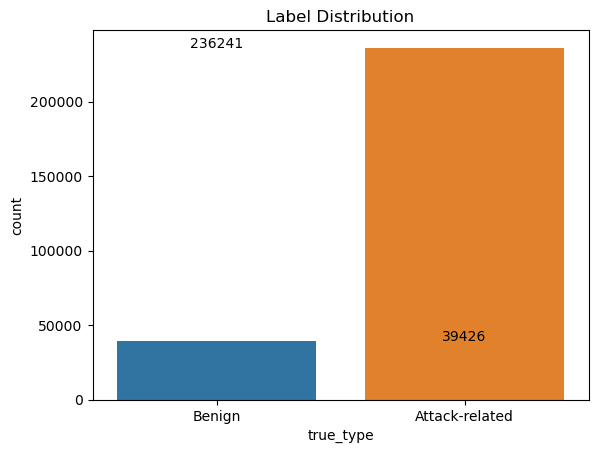

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df_raw['true_type'])
plt.title("Label Distribution")
plt.xticks(ticks=[0,1], labels=['Benign', 'Attack-related'])

for i in range(2):
    count = df_raw['true_type'].value_counts().values[i]
    plt.text(i, count, str(count), ha = 'center')
plt.show()

In [145]:
#Rename column name
df_raw.columns = ['raw', 'true_type', 'labels']

In [146]:
import re
import pandas as pd

def parse_log(log_lines):
    data = []

    # Regular expressions for each type of log line
    query_a_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: query\[A\] '
        r'(?P<domain>[^\s]+) '
        r'from (?P<src_ip>[^\s]+)'
    )
    query_aaaa_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: query\[AAAA\] '
        r'(?P<domain>[^\s]+) '
        r'from (?P<src_ip>[^\s]+)'
    )
    query_srv_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: query\[SRV\] '
        r'(?P<domain>[^\s]+) '
        r'from (?P<src_ip>[^\s]+)'
    )
    query_txt_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: query\[TXT\] '
        r'(?P<domain>[^\s]+) '
        r'from (?P<src_ip>[^\s]+)'
    )
    query_ptr_pattern = re.compile(
    r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
    r'dnsmasq\[\d+\]: query\[PTR\] '
    r'(?P<domain>[^\s]+) '
    r'from (?P<src_ip>[^\s]+)$'
    )
    query_mx_pattern = re.compile(
    r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
    r'dnsmasq\[\d+\]: query\[MX\] '
    r'(?P<domain>[^\s]+) '
    r'from (?P<src_ip>[^\s]+)$'
    )
    
    forwarded_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: forwarded '
        r'(?P<domain>[^\s]+) '
        r'to (?P<dst_ip>[^\s]+)'
    )

    reply_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: reply '
        r'(?P<domain>[^\s]+) '
        r'is (?P<resolved_ip>[^\s]+)'
    )

    cached_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: cached '
        r'(?P<domain>[^\s]+) '
        r'is (?P<resolved_ip>[^\s]+)'
    )

    nameserver_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: nameserver '
        r'(?P<nameserver_ip>[^\s]+) '
        r'refused to do a recursive query$'
    )

    for line in log_lines:
        #Query
        if match := query_a_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_a'
            data.append(match_data)
        elif match := query_aaaa_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_aaaa'
            data.append(match_data)
        elif match := query_srv_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_srv'
            data.append(match_data)
        elif match := query_txt_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_txt'
            data.append(match_data)
        elif match := query_ptr_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_ptr'
            data.append(match_data)
        elif match := query_mx_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_mx'
            data.append(match_data)

        #Forwarded
        elif match := forwarded_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'forwarded'
            data.append(match_data)
        
        #Reply
        elif match := reply_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'reply'
            data.append(match_data)
        
        #Cached
        elif match := cached_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'cached'
            data.append(match_data)

        #Nameserver
        elif match := nameserver_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'nameserver'
            data.append(match_data)

        #Default
        else:
            print(f"Line does not match any pattern: {line}")

    df = pd.DataFrame(data)
    
    # Convert timestamp to a datetime object
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%b %d %H:%M:%S', errors='coerce')
    df["message_type"] = df["message_type"].astype(str)
    
    return df

#Call parse_log function on df_auth['raw'] to parse the log lines
df_structured = parse_log(df_raw["raw"])
add_true_labels(df_structured)

,timestamp,domain,src_ip,message_type,dst_ip,resolved_ip,nameserver_ip,true_type,labels
0,1900-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11B...,192.168.104.218,query_a,NaN,NaN,NaN,1,"['dnsteal', 'attacker', 'd..."
1,1900-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11B...,NaN,forwarded,10.229.255.254,NaN,NaN,1,"['dnsteal', 'attacker', 'd..."
2,1900-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11B...,NaN,reply,NaN,10.195.165.2,NaN,1,"['dnsteal', 'attacker', 'd..."
3,1900-01-14 00:00:23,_http._tcp.security.ubuntu...,172.21.128.119,query_srv,NaN,NaN,NaN,0,nan
4,1900-01-14 00:00:23,_http._tcp.security.ubuntu...,NaN,forwarded,10.229.255.254,NaN,NaN,0,nan
...,...,...,...,...,...,...,...,...,...
275662,1900-01-17 23:44:37,motd.ubuntu.com,NaN,reply,NaN,2a05:d018:91c:3200:2846:99...,NaN,0,nan
275663,1900-01-17 23:44:37,motd.ubuntu.com,NaN,reply,NaN,34.243.160.129,NaN,0,nan
275664,1900-01-17 23:44:37,motd.ubuntu.com,NaN,reply,NaN,54.171.230.55,NaN,0,nan
275665,1900-01-17 23:58:37,mail,172.21.131.50,query_aaaa,NaN,NaN,NaN,0,nan


In [147]:
import pandas as pd
import numpy as np

def convert_ip_to_number(ip):
    if pd.isna(ip):
        return 0
    
    # Split the IP address into octets
    octets = ip.split('.')

    # Add leading zeros to each octet if it has less than 3 digits
    modified_octets = [ip if len(ip) >= 3 else '0' + ip for ip in octets]

    # Join the modified octets back into a string without dots
    modified_ip = ''.join(modified_octets)

    # Convert the modified IP string to an integer
    ip_number = int(modified_ip)

    return ip_number

# Apply the updated convert_ip_to_number() function to the src_ip column
df_structured['src_ip'] = df_structured['src_ip'].apply(convert_ip_to_number)
df_structured["dst_ip"] = df_structured["dst_ip"].apply(convert_ip_to_number)
#df_structured["resolved_ip"] = df_structured["resolved_ip"].apply(convert_ip_to_number)
df_structured["nameserver_ip"] = df_structured["nameserver_ip"].apply(convert_ip_to_number)

In [148]:
row_values = list(dict.fromkeys(df_structured["src_ip"].values.tolist()))
print("Source IPs: ", row_values)
row_values = list(dict.fromkeys(df_structured["dst_ip"].values.tolist()))
print("Destination IPs: ", row_values)
row_values = list(dict.fromkeys(df_structured["resolved_ip"].values.tolist()))
print("Resolved IPs: ", row_values)
row_values = list(dict.fromkeys(df_structured["nameserver_ip"].values.tolist()))
print("Nameserver IPs: ", row_values)


Source IPs:  [192168104218, 0, 172021128119, 19216810401, 17202112801, 172021131050, 192168104133, 172021131122, 192168104205, 192168104155, 172021129224, 192168104098, 172021128054, 192168104095, 192168104125, 192168104088, 192168104214, 192168104081, 192168104198, 192168104141, 19216810404]
Destination IPs:  [0, 10229255254, 127000001]
Resolved IPs:  [nan, '10.195.165.2', '91.189.88.142', '91.189.88.152', '2001:67c:1360:8001::23', '2001:67c:1360:8001::24', '91.189.95.85', '91.189.91.38', '91.189.91.39', '2001:67c:1560:8008::19', '2001:67c:1562::15', '2001:67c:1562::18', '2600:1f1c:702:ae00:f27c:d805:3b80:a45d', '52.52.118.245', 'NXDOMAIN', '0.103.5:62:26421:1642112940:1:90:49192:333', '<CNAME>', '2606:4700::6810:db54', '2606:4700::6810:da54', '104.16.219.84', '104.16.218.84', '12.167.151.33', '54.171.230.55', '34.243.160.129', '2a05:d018:91c:3200:c887:2f22:290f:a7c', '2a05:d018:91c:3200:2846:99fb:81b6:1e11', '0.103.5:62:26421:1642120140:1:90:49192:333', '2600:1901:0:1d7::', '34.120.1

In [149]:
df_structured.head()

,timestamp,domain,src_ip,message_type,dst_ip,resolved_ip,nameserver_ip,true_type,labels
0,1900-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11B...,192168104218,query_a,0,NaN,0,1,"['dnsteal', 'attacker', 'd..."
1,1900-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11B...,0,forwarded,10229255254,NaN,0,1,"['dnsteal', 'attacker', 'd..."
2,1900-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11B...,0,reply,0,10.195.165.2,0,1,"['dnsteal', 'attacker', 'd..."
3,1900-01-14 00:00:23,_http._tcp.security.ubuntu...,172021128119,query_srv,0,NaN,0,0,nan
4,1900-01-14 00:00:23,_http._tcp.security.ubuntu...,0,forwarded,10229255254,NaN,0,0,nan


In [150]:
df_structured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275667 entries, 0 to 275666
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   timestamp      275667 non-null  datetime64[ns]
 1   domain         257293 non-null  object        
 2   src_ip         275667 non-null  int64         
 3   message_type   275667 non-null  object        
 4   dst_ip         275667 non-null  int64         
 5   resolved_ip    123148 non-null  object        
 6   nameserver_ip  275667 non-null  int64         
 7   true_type      275667 non-null  object        
 8   labels         275667 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 18.9+ MB


In [151]:
df_structured.describe(include="object")

,domain,message_type,resolved_ip,true_type,labels
count,257293,275667,123148,275667,275667
unique,18588,10,9232,2,8
top,mail.smith.santos.com,reply,<CNAME>,0,nan
freq,15426,109649,19744,236241,236241


In [152]:
df_structured.isnull().sum()

timestamp             0
domain            18374
src_ip                0
message_type          0
dst_ip                0
resolved_ip      152519
nameserver_ip         0
true_type             0
labels                0
dtype: int64